In [134]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.patches as patches
# from matplotlib.font_manager import FontProperties
from pypinyin import pinyin, Style
import numpy as np
from datetime import datetime
import os

Article len: 481, 481


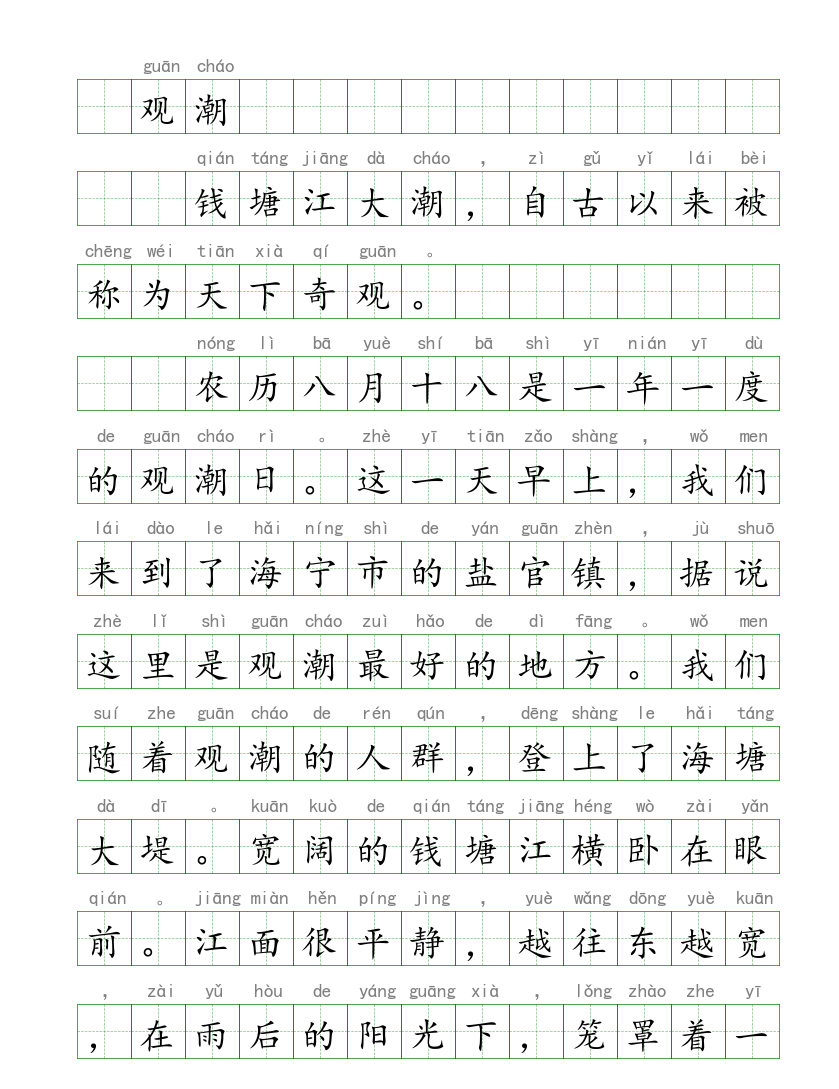

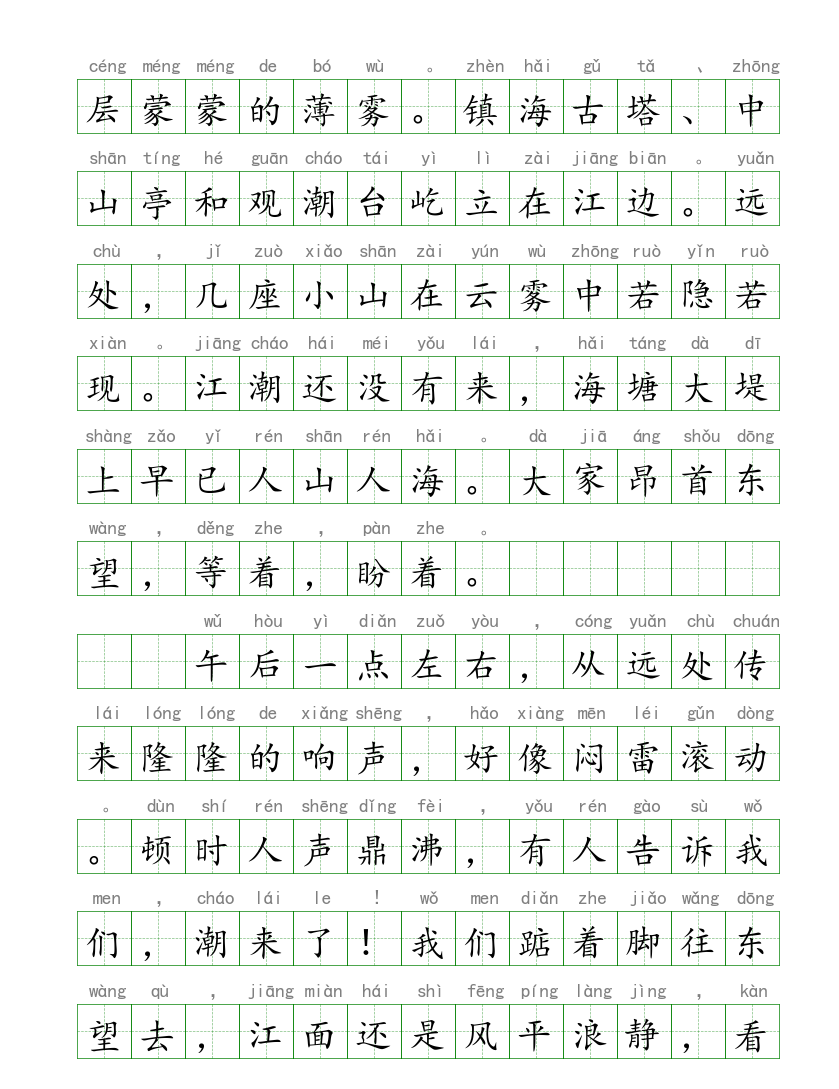

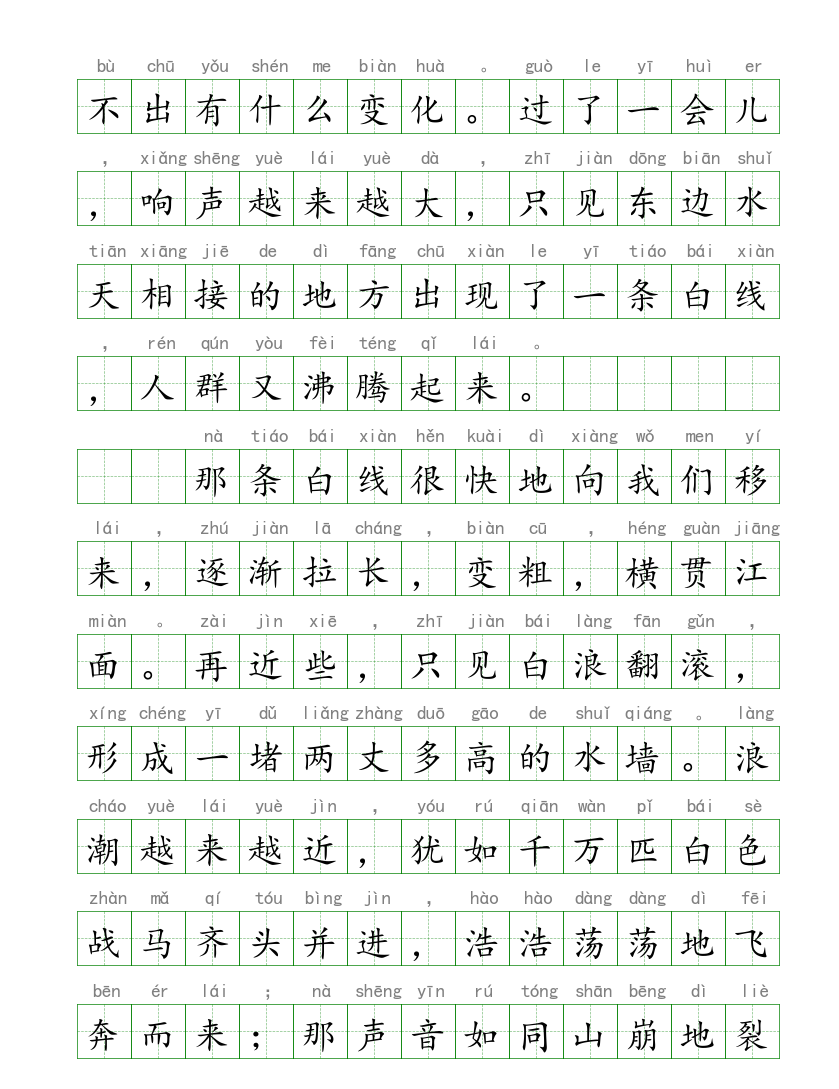

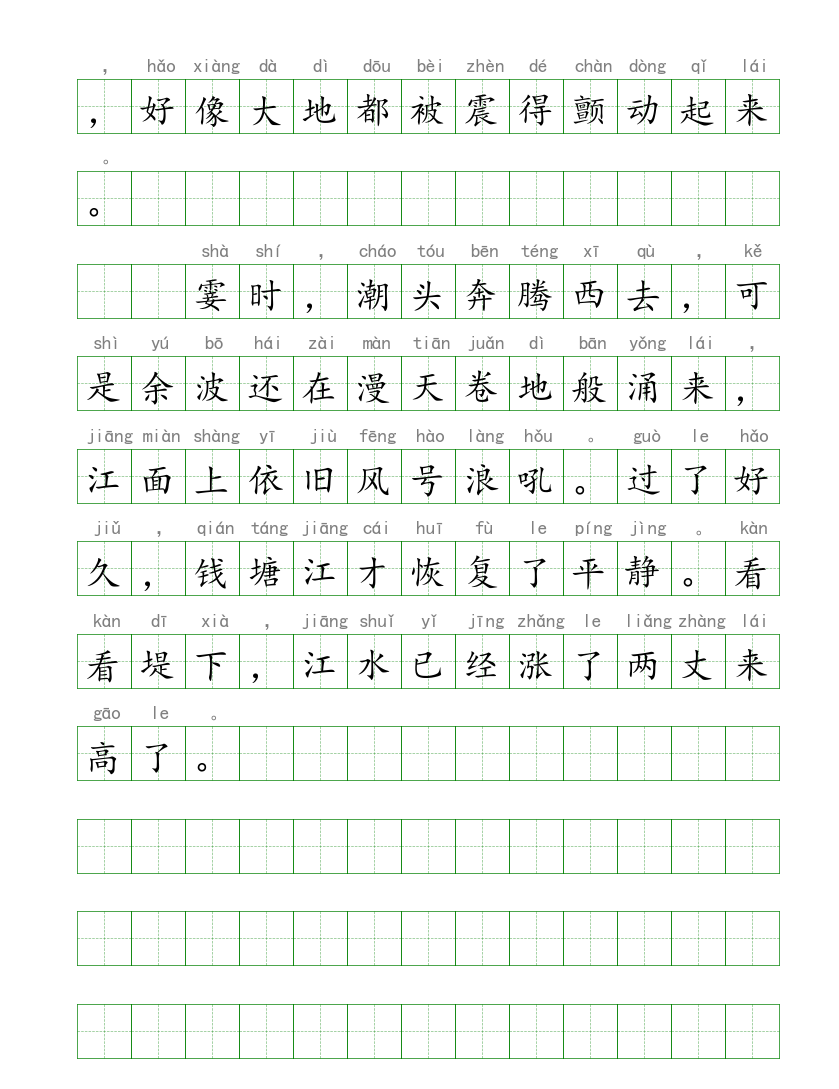

In [155]:
def draw_grid(length, position):
    x, y = position
    # y += length 

    # 画四个边框
    plt.plot([x, x+length], [y, y], 'g-', linewidth=0.5)  # 上
    plt.plot([x, x+length], [y-length, y-length], 'g-', linewidth=0.5)  # 下
    plt.plot([x, x], [y, y-length], 'g-', linewidth=0.5)  # 左
    plt.plot([x+length, x+length], [y, y-length], 'g-', linewidth=0.5)  # 右

    # 画中间的线，使用虚线
    plt.plot([x, x+length], [y-length/2, y-length/2], 'g--', alpha=0.5, linewidth=0.5)  # 横
    plt.plot([x+length/2, x+length/2], [y, y-length], 'g--', alpha=0.5, linewidth=0.5)  # 纵

# 使用这个函数
width_inch = 8.5
height_inch = 11

grid_width = 1.4/2.54

page_row_cnt = 11
page_col_cnt = 13
page_cnt = 0


start_x = 1.9/2.54
start_y = 1.9/2.54
space_v = 1 / 2.54




article = """观潮

钱塘江大潮，自古以来被称为天下奇观。

农历八月十八是一年一度的观潮日。这一天早上，我们来到了海宁市的盐官镇，据说这里是观潮最好的地方。我们随着观潮的人群，登上了海塘大堤。宽阔的钱塘江横卧在眼前。江面很平静，越往东越宽，在雨后的阳光下，笼罩着一层蒙蒙的薄雾。镇海古塔、中山亭和观潮台屹立在江边。远处，几座小山在云雾中若隐若现。江潮还没有来，海塘大堤上早已人山人海。大家昂首东望，等着，盼着。

午后一点左右，从远处传来隆隆的响声，好像闷雷滚动。顿时人声鼎沸，有人告诉我们，潮来了！我们踮着脚往东望去，江面还是风平浪静，看不出有什么变化。过了一会儿，响声越来越大，只见东边水天相接的地方出现了一条白线，人群又沸腾起来。

那条白线很快地向我们移来，逐渐拉长，变粗，横贯江面。再近些，只见白浪翻滚，形成一堵两丈多高的水墙。浪潮越来越近，犹如千万匹白色战马齐头并进，浩浩荡荡地飞奔而来；那声音如同山崩地裂，好像大地都被震得颤动起来。

霎时，潮头奔腾西去，可是余波还在漫天卷地般涌来，江面上依旧风号浪吼。过了好久，钱塘江才恢复了平静。看看堤下，江水已经涨了两丈来高了。
"""


saved_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Personal\Projects\copybook_chinese'
basename = fr'字帖_{datetime.now().strftime("%Y_%m_%d_%H%M%S")}.pdf'
new_name = os.path.join(saved_dir, basename)

for i in range(10):
    # print(len(article))
    article = article.replace("\n\n", "\n")
    

pronunciations = pinyin(article,   v_to_u=True )

def clean_pinyin(pronunciations):
    result = []
    for pronu in pronunciations:
        if '\n' in pronu[0] and len(pronu[0]) > 1:
            # print("pronu:", pronu)
            # print("pronu[0]:", pronu[0])
            # If '\n' is in the string, insert a space before the string
 
            
            # print("pronu[0][0]:", pronu[0][0])
            # print("pronu[0][1]:", pronu[0][1])
            result.append(pronu[0][0])
            result.append(pronu[0][1])
            continue
         # Add the current string to the result list
        result.append([pronu[0]])
    return result
    
pronunciations = clean_pinyin(pronunciations)
print(f"Article len: {len(article)}, {len(pronunciations)}")

if len(article)  != len(pronunciations):
    print(f"Article len: {len(article)}, {len(pronunciations)}")


idx = 0
current_row = 0
current_col = 0
curernt_page = 0

def draw_tian_zi_ge_page():
    ax, fig = plt.subplots(figsize=(width_inch, height_inch))
    for r in range(page_row_cnt):
        for c in range(page_col_cnt):
            grid_x = start_x + c * grid_width
            grid_y = height_inch - start_y - (r * (grid_width + space_v))  # (height_inch - start_y )
                    # print(f"Row: {r1}, col: {c}, grid_x: {grid_x:0.2f}, grid_y: {grid_y:0.2f}")
            draw_grid(grid_width, (grid_x, grid_y))
    return ax, fig
    

    


ax, fig = draw_tian_zi_ge_page()

while idx < len(article):
    char = article[idx]
    if char == '\n':
        current_row += 1
        current_col = 1  # do not understand
        
    else:
        current_col += 1
        
    if current_col == page_col_cnt:
        current_row += 1
        current_col = 0
        
    if current_row == page_row_cnt:
        current_row = 0
        
        
        plt.axis('equal')  # 使 x 轴和 y 轴的单位长度相等
        plt.xlim([0, width_inch])
        plt.ylim([0, height_inch])

        # 保存为 PDF 文件
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(new_name, format='pdf')
        ax, fig = draw_tian_zi_ge_page()
            # idx = r1 * col_cnt + c
            # char = article[idx]

            # char = article[idx]
            # print("char:", char)
            # print(f"Row: {r1}, col: {c}, idx: {idx}")
            
                # r1 = r1 + 1
                # r = row_cnt - r1    
                # c = 0
                # idx += 1
                # idx = r1 * col_cnt + c
                # print("char:", char)

            # pronu = pronunciations[idx][0]

    grid_x = start_x + current_col * grid_width
    grid_y = height_inch - start_y - (current_row * (grid_width + space_v))  # (height_inch - start_y )
            # print(f"Row: {r1}, col: {c}, grid_x: {grid_x:0.2f}, grid_y: {grid_y:0.2f}")

    # draw_grid(grid_width, (grid_x, grid_y))
 
            # 拼音
            # plt.text(grid_x + grid_width * 0.14, grid_y + grid_width * 0.15, pronu, fontsize=10,  color='grey')  # , fontsize=14, ha='center', color='grey'

    font_name = "KaiTi"
    mpl.rcParams['font.family']= font_name # 指定字体，实际上相当于修改 matplotlibrc 文件　只不过这样做是暂时的　下次失效
    mpl.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框
    plt.text(grid_x + grid_width * 0.14, grid_y - grid_width * 0.8, char, fontsize=30,  color='black', alpha=1)  # , fontsize=14, ha='center', color='grey
    
    font_name = "SimHei"
    mpl.rcParams['font.family']= font_name # 指定字体，实际上相当于修改 matplotlibrc 文件　只不过这样做是暂时的　下次失效
    mpl.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框
    pronu = pronunciations[idx][0]
    plt.text(grid_x + grid_width * (3.5/7 - (len(pronu)/7)/2), grid_y + grid_width * 0.15, pronu, fontsize=14,  color='grey')  # , fontsize=14, ha='center', color='grey'
            
    idx += 1
    
    
if idx == len(article):
    # current_row = 0
    # ax, fig = plt.subplots(figsize=(width_inch, height_inch))

    plt.axis('equal')  # 使 x 轴和 y 轴的单位长度相等
    plt.xlim([0, width_inch])
    plt.ylim([0, height_inch])

    # 保存为 PDF 文件
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(new_name, format='pdf')
    
    
    
# font_name = "SimHei"
# mpl.rcParams['font.family']= font_name # 指定字体，实际上相当于修改 matplotlibrc 文件　只不过这样做是暂时的　下次失效
# mpl.rcParams['axes.unicode_minus']=False # 正确显示负号，防止变成方框

# for r1 in range(row_cnt):
#     r = row_cnt - r1    
#     for c in range(col_cnt): 
        
#         grid_x = start_x + c * grid_width
#         grid_y = height_inch - start_y - (r1 * (grid_width + space_v))  # (height_inch - start_y )
#         # print(f"Row: {r1}, col: {c}, grid_x: {grid_x:0.2f}, grid_y: {grid_y:0.2f}")
#         draw_grid(grid_width, (grid_x, grid_y))
#         idx = r1 * col_cnt + c
#         char = article[idx]
#         pronu = pronunciations[idx][0]
        # pronunciations = pinyin(char,   v_to_u=True )[0][0]
# 
        # 拼音
        # plt.text(grid_x + grid_width * (3.5/7 - (len(pronu)/7)/2), grid_y + grid_width * 0.15, pronu, fontsize=10,  color='grey')  # , fontsize=14, ha='center', color='grey'
    
        # 汉字
        # plt.text(grid_x + grid_width * 0.14, grid_y - grid_width * 0.8, char, fontsize=22,  color='r', alpha=0.5)  # , fontsize=14, ha='center', color='grey'
    
    
    
    


In [57]:
pronunciations = pinyin(article, v_to_u=True )
pronunciations

[['guān'],
 ['cháo'],
 ['\n'],
 ['qián'],
 ['táng'],
 ['jiāng'],
 ['dà'],
 ['cháo'],
 ['，'],
 ['zì'],
 ['gǔ'],
 ['yǐ'],
 ['lái'],
 ['bèi'],
 ['chēng'],
 ['wéi'],
 ['tiān'],
 ['xià'],
 ['qí'],
 ['guān'],
 ['。\n'],
 ['nóng'],
 ['lì'],
 ['bā'],
 ['yuè'],
 ['shí'],
 ['bā'],
 ['shì'],
 ['yī'],
 ['nián'],
 ['yī'],
 ['dù'],
 ['de'],
 ['guān'],
 ['cháo'],
 ['rì'],
 ['。'],
 ['zhè'],
 ['yī'],
 ['tiān'],
 ['zǎo'],
 ['shàng'],
 ['，'],
 ['wǒ'],
 ['men'],
 ['lái'],
 ['dào'],
 ['le'],
 ['hǎi'],
 ['níng'],
 ['shì'],
 ['de'],
 ['yán'],
 ['guān'],
 ['zhèn'],
 ['，'],
 ['jù'],
 ['shuō'],
 ['zhè'],
 ['lǐ'],
 ['shì'],
 ['guān'],
 ['cháo'],
 ['zuì'],
 ['hǎo'],
 ['de'],
 ['dì'],
 ['fāng'],
 ['。'],
 ['wǒ'],
 ['men'],
 ['suí'],
 ['zhe'],
 ['guān'],
 ['cháo'],
 ['de'],
 ['rén'],
 ['qún'],
 ['，'],
 ['dēng'],
 ['shàng'],
 ['le'],
 ['hǎi'],
 ['táng'],
 ['dà'],
 ['dī'],
 ['。'],
 ['kuān'],
 ['kuò'],
 ['de'],
 ['qián'],
 ['táng'],
 ['jiāng'],
 ['héng'],
 ['wò'],
 ['zài'],
 ['yǎn'],
 ['qián'],
 ['。'],
 ['jiāng'],
 ['mi

In [62]:
pinyin('重心')[1][0]

'xīn'